# Importação das bibliotecas

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter


# Leitura da Base

In [86]:
df = pd.read_csv("/content/drive/MyDrive/PCD1/assets/data/bases_modificadas/State_of_Data_dados_tratados.csv")

# Definição do Atributo alvo

In [87]:
y = df['progressao_prejudicada']
X = df.drop('progressao_prejudicada', axis=1)

# Balanceamento com Smote

In [88]:
# 2. Definir a variável alvo e remover registros onde ela é nula
TARGET_COLUMN = 'progressao_prejudicada'

print("Distribuição das Classes ANTES do SMOTE:")
class_distribution_before = Counter(y)
print(class_distribution_before)
print("-" * 50)


# 5. Converter todas as Features (X) para formato numérico -> Passo Essencial
# Usando pd.get_dummies() para fazer o One-Hot Encoding de forma direta.
# Isso transforma todas as colunas de texto em colunas numéricas (0s e 1s).
X_numeric = pd.get_dummies(X)

print(f"Formato de X antes da conversão: {X.shape}")
print(f"Formato de X após conversão para numérico (get_dummies): {X_numeric.shape}")
print("-" * 50)


# --- AVISO IMPORTANTE SOBRE DIVISÃO TREINO/TESTE ---
print("AVISO: Em um projeto real, o SMOTE deve ser aplicado APENAS nos dados de TREINO.")
print("-" * 50)
# ---------------------------------------------------


# 6. Aplicar o SMOTE
print("Aplicando SMOTE para balancear as classes...")
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print("SMOTE concluído.")
print("-" * 50)



Distribuição das Classes ANTES do SMOTE:
Counter({0.0: 3309, 1.0: 438})
--------------------------------------------------
Formato de X antes da conversão: (3747, 92)
Formato de X após conversão para numérico (get_dummies): (3747, 92)
--------------------------------------------------
AVISO: Em um projeto real, o SMOTE deve ser aplicado APENAS nos dados de TREINO.
--------------------------------------------------
Aplicando SMOTE para balancear as classes...
SMOTE concluído.
--------------------------------------------------


# Separação em treino e teste

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y
)

In [90]:
X_train.shape

(5625, 92)

In [91]:
X_test.shape

(993, 92)

In [92]:
y_train.shape

(5625,)

In [93]:
y_test.shape

(993,)

Instanciando o modelo de Random Forest

In [94]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
)

rf_model.fit(X_train, y_train)


scores = cross_val_score(rf_model, X, y, cv=5)
scores


array([0.75151057, 0.97356495, 0.97280967, 0.96900983, 0.97883598])

Acurácia treino: 0.9996444444444444

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2812
         1.0       1.00      1.00      1.00      2813

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



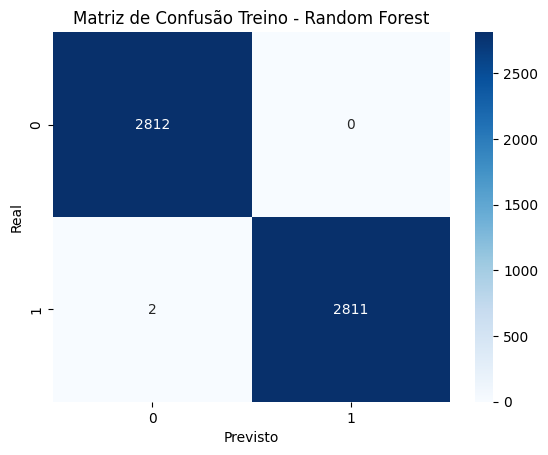

Acurácia teste: 0.9375629405840886

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       497
         1.0       0.95      0.92      0.94       496

    accuracy                           0.94       993
   macro avg       0.94      0.94      0.94       993
weighted avg       0.94      0.94      0.94       993



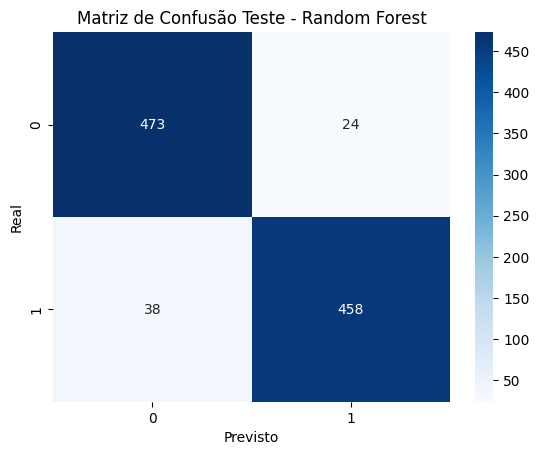

In [95]:
y_pred_tr = rf_model.predict(X_train)

print("Acurácia treino:", accuracy_score(y_train, y_pred_tr))
print("\nRelatório de Classificação:\n", classification_report(y_train, y_pred_tr))

# Matriz de Confusão de treino
cm = confusion_matrix(y_train, y_pred_tr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Treino - Random Forest")
plt.show()



y_pred_te = rf_model.predict(X_test)

print("Acurácia teste:", accuracy_score(y_test, y_pred_te))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_te))

# Matriz de Confusão de treino
cm = confusion_matrix(y_test, y_pred_te)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Teste - Random Forest")
plt.show()

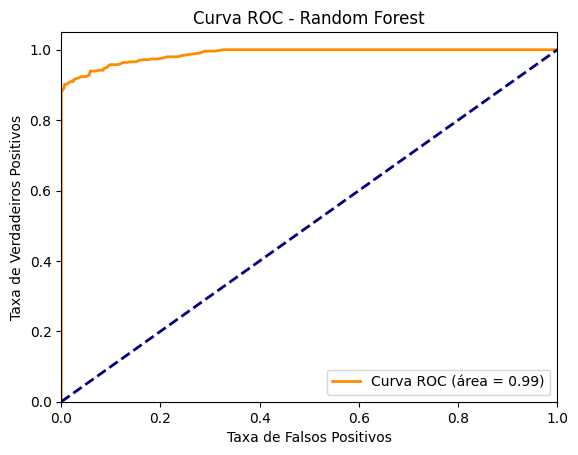

In [96]:
# prompt: faça uma gráfico de curva roc

from sklearn.metrics import roc_curve, auc

# Calcula as probabilidades das classes para o conjunto de teste
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calcula a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plota a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()
